<AxesSubplot:xlabel='default', ylabel='balance'>

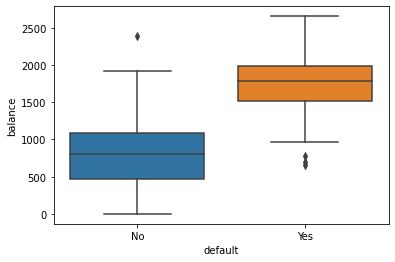

In [2]:
#replace lines that have "###" with the appropriate commands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data on payment defaults
df=pd.read_csv("default.csv")
df.head(5)

#Look at the distribution with a boxplot
sns.boxplot(x="default",y="balance",data=df)

In [3]:
df.head(5)

,default,student,balance,income
0,No,Yes,1436.829989,22925.46992
1,No,Yes,843.017897,12268.93352
2,No,No,1410.959915,58310.25593
3,No,Yes,598.733313,23118.53110
4,No,No,72.928370,13300.76955


In [9]:
#Preprocessing the data
#create a temporary variable "temp" that contains columns default and student
###
temp = df[['default','student']]

In [10]:
#Convert to dummy variables
temp=pd.get_dummies(temp, prefix=['default', 'student'])

In [11]:
#dropping the redundant variables
temp=temp.drop(['default_No','student_No'],axis=1)

In [12]:
#train is the preprocessed data that we will use
train = pd.concat([df["balance"],df["income"],temp],axis=1)

In [13]:
train.columns

Index(['balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [14]:
#Separate x and y variables
x=train[["balance"]]  #for x variable use double brackets
###
y=train['default_Yes']

In [15]:
#train_test_split: splits the data into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=101)

In [16]:
# using linear regression model
from sklearn.linear_model import LinearRegression #import regression model

lm = LinearRegression() #initialize the model

lm.fit(x_train,y_train) #fitting the model (or training it)

predictions = lm.predict(x_test)

In [17]:
print(predictions)

[ 0.03138685  0.32410235  0.64796244  0.663994    0.51488223  0.4418555
  0.18742694  0.64708127  0.25254661  0.95357284 -0.10501166  0.17456118
  0.68271064  0.67778998  0.16051115 -0.10811766  0.7672006  -0.02107125
  0.42558837  0.04598908  0.55480816  0.16541797  0.77732166  0.40028727
  1.09611489  0.24262256  0.5181053   0.88916099  0.99708557  0.43383063
  0.51698417 -0.21947763  0.83163859  0.71193802  0.35050441  0.2158217
  0.74482482  0.81154098  0.0940759   0.31239812  1.04019705  0.89406023
  1.02735413  0.49317569 -0.09482633  0.38092082 -0.01713579  0.64866303
  0.8427619   0.10065425  0.38687405  0.79628395  0.37337547  0.18316622
  1.02988432  0.18493264  1.05954648  0.30609283  0.771117    1.15583769
  0.67060262  0.13358239  1.07712033  0.19118168  1.02804172  0.35362016
  0.74800387  0.74596516  0.58954465 -0.27597556  0.29022865  0.36000955
  0.79185785  0.76965808  0.68885629  0.39414747  0.74873336  0.78309279
  0.91429982  1.01835399  1.02724244  0.95516295  0.3

In [18]:
from sklearn.linear_model import LogisticRegression


logmodel = LogisticRegression() #initialize the model
logmodel.fit(x_train,y_train) #train the model, learning happens here

LogisticRegression()

In [26]:
#predictions made on test data
log_predictions = logmodel.predict(x_test)

print (logmodel.intercept_)  #this is the intercept 
print (logmodel.coef_.tolist())  #  the coefficient

#How good is our model?
from sklearn.metrics import classification_report
print(classification_report(y_test,log_predictions))

print(log_predictions)

[-7.23786769]
[[0.00554109886723289]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        97
           1       0.84      0.87      0.86        99

    accuracy                           0.85       196
   macro avg       0.85      0.85      0.85       196
weighted avg       0.85      0.85      0.85       196

[0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1
 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 1 0 0]


In [27]:
#building the model part 2
#In this model we will use all the x variables for classification


#Separate x and y variables
x=train[["balance","income","student_Yes"]]#for x variables use double brackets
y=train['default_Yes']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [31]:
print (logmodel.intercept_) #this is the intercept 
print (logmodel.coef_.tolist()) #the coefficients

#How good is our model?
from sklearn.metrics import classification_report
print(classification_report(y_test,log_predictions))

[-2.23548162]
[[0.004561975744750606, -8.294704728158599e-05, -2.4865399975514557]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        97
           1       0.84      0.87      0.86        99

    accuracy                           0.85       196
   macro avg       0.85      0.85      0.85       196
weighted avg       0.85      0.85      0.85       196

